<a href="https://colab.research.google.com/github/bagusamandira/Machine-Learning/blob/main/K-meansCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dummy data with sklearn
from sklearn.datasets import make_blobs

x, y_true = make_blobs(n_samples=1000, n_features = 4, centers = 4, cluster_std = 3)

<Axes: >

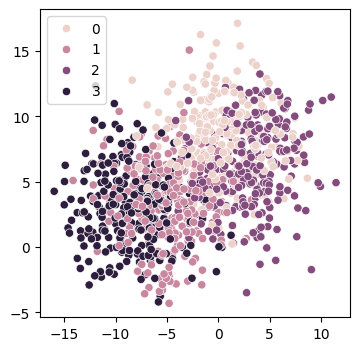

In [3]:
fig,ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
sns.scatterplot(ax=ax, x = x[:,0], y=x[:,1], hue=y_true)

In [4]:
#standardize
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
x_standardise = scaler.fit_transform(x)

In [6]:
pd.DataFrame(x_standardise).describe()

,0,1,2,3
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.025047e-16,1.360689e-15,-8.526513e-17,9.769963e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.487415e+00,-2.597526e+00,-2.283617e+00,-2.709147e+00
25%,-7.713799e-01,-6.772276e-01,-6.775772e-01,-7.214038e-01
50%,9.165879e-03,-3.046690e-02,2.826018e-01,-5.011542e-02
75%,7.760702e-01,6.898422e-01,7.489847e-01,7.180041e-01
max,2.590514e+00,3.231356e+00,1.800285e+00,2.708391e+00


In [7]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(x_standardise)
x_pca = pca.transform(x_standardise)

<Axes: >

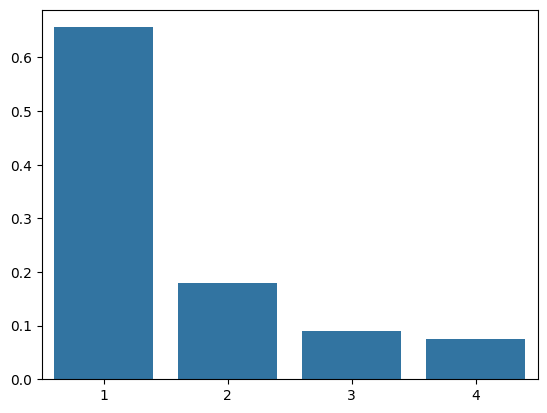

In [8]:
variance = pca.explained_variance_ratio_

sns.barplot(x=list(range(1,len(variance)+1)), y=variance)

<Axes: >

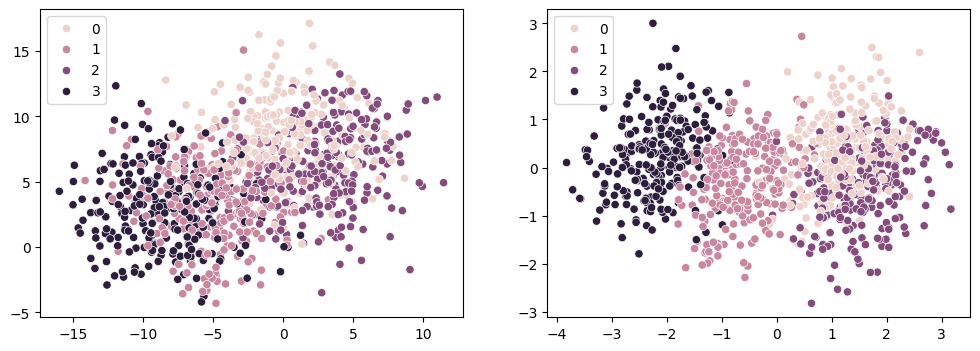

In [9]:
#visualize

fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
sns.scatterplot(ax=ax1, x = x[:,0], y=x[:,1], hue=y_true)
sns.scatterplot(ax=ax2, x = x_pca[:,0], y=x_pca[:,1], hue=y_true)

In [10]:
#kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca[:,0:3])
y_kmeans_pca3 = kmeans.predict(x_pca[:,0:3])

kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca[:,0:2])
y_kmeans_pca2 = kmeans.predict(x_pca[:,0:2])


<Axes: >

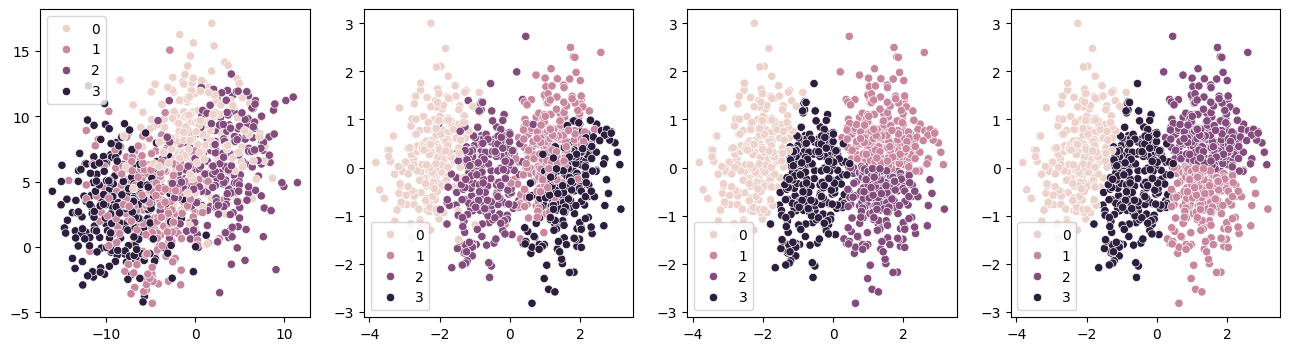

In [13]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.set_figheight(4)
fig.set_figwidth(16)
sns.scatterplot(ax=ax1, x = x[:,0], y=x[:,1], hue=y_true)
sns.scatterplot(ax=ax2, x = x_pca[:,0], y=x_pca[:,1], hue=y_kmeans)
sns.scatterplot(ax=ax3, x = x_pca[:,0], y=x_pca[:,1], hue=y_kmeans_pca3)
sns.scatterplot(ax=ax4, x = x_pca[:,0], y=x_pca[:,1], hue=y_kmeans_pca2)